# EDA of Top Games on Google Play Store

- With help of this study, I aimed to to focus on "android-games" dataset to make Exploratory Data Analysis.
- It is designed to be a beginner-friendly study.

Let's begin with importing the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [2]:
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Overview

- Read the csv
- Get basic information from the dataset

In [3]:
df = pd.read_csv("android-games.csv")

In [7]:
df.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [8]:
df.tail()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
1725,96,زوايا - لعبة ستحرك زوايا عقلك,112408,1.0 M,4,0.9,1.8,0.0,GAME WORD,101036,3607,3237,1229,3297,False
1726,97,Bible Word Puzzle - Free Bible Word Games,111595,1.0 M,4,0.9,2.3,0.0,GAME WORD,88950,14856,4297,1385,2103,False
1727,98,Scrabble® GO - New Word Game,110723,10.0 M,4,0.9,1.9,0.0,GAME WORD,64184,18332,9385,6688,12132,False
1728,99,Word Nut: Word Puzzle Games & Crosswords,109530,5.0 M,4,1.9,4.1,0.0,GAME WORD,99987,4766,1469,953,2353,False
1729,100,Pinturillo 2,108917,10.0 M,3,1.1,2.5,0.0,GAME WORD,50813,16480,11825,6166,23631,False


In [9]:
df.sample(5)

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
1442,17,Rise of Kingdoms: Lost Crusade,1651636,10.0 M,4,1.5,3.3,0.0,GAME STRATEGY,1165118,185134,73380,37330,190672,False
569,44,NEW SLOTS 2021－free casino games & slot machines,265946,5.0 M,4,0.9,1.8,0.0,GAME CASINO,219920,23950,8698,2822,10553,False
1321,96,Happy Pet Story: Virtual Pet Game,371385,10.0 M,4,0.8,1.6,0.0,GAME SIMULATION,293088,33781,16211,7196,21108,False
199,100,Prison Escape Puzzle: Adventure,154835,10.0 M,4,0.3,0.7,0.0,GAME ADVENTURE,99726,22100,12197,5612,15197,False
215,16,Block Craft 3D: Building Simulator Games For Free,2156973,100.0 M,4,1.8,3.9,0.0,GAME ARCADE,1510574,191501,113211,71395,270289,False


- Let's see df's dimensionality. We have 1730 rows (Games) and 15 columns (Feature). 

In [10]:
df.shape

(1730, 15)

- Now we can display all columns and their data types.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


- An overview of the values each column contains. Below we can see some basic descriptive statistics for all numeric columns.

In [12]:
df.describe()

,rank,total ratings,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
count,1730.000000,1.730000e+03,1730.000000,1730.000000,1730.000000,1730.000000,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03
mean,50.386705,1.064332e+06,3.908092,321.735896,122.554971,0.010942,7.622315e+05,1.164366e+05,5.706307e+04,2.710336e+04,1.014950e+05
std,28.936742,3.429250e+06,0.290973,6018.914507,2253.891703,0.214987,2.538658e+06,3.021631e+05,1.495314e+05,8.154542e+04,4.083745e+05
min,1.000000,3.299300e+04,2.000000,0.000000,0.000000,0.000000,1.397500e+04,2.451000e+03,7.180000e+02,2.660000e+02,5.450000e+02
25%,25.000000,1.759992e+05,4.000000,0.100000,0.200000,0.000000,1.277300e+05,2.064300e+04,9.652500e+03,4.262250e+03,1.281200e+04
50%,50.000000,4.286065e+05,4.000000,0.500000,1.000000,0.000000,2.964340e+05,5.098050e+04,2.507800e+04,1.067550e+04,3.368600e+04
75%,75.000000,8.837970e+05,4.000000,1.700000,3.300000,0.000000,6.198358e+05,1.018140e+05,5.229500e+04,2.322875e+04,8.015725e+04
max,100.000000,8.627313e+07,4.000000,227105.700000,69441.400000,7.490000,6.354677e+07,5.404966e+06,3.158756e+06,2.122183e+06,1.249592e+07


- We can also analyze other data types. But we can not calculate a mean or a standard deviation for the object columns. However, it will still display some descriptive statistics

In [13]:
df.describe(include=object)

,title,installs,category
count,1730,1730,1730
unique,1675,9,17
top,Solitaire,10.0 M,GAME CARD
freq,36,805,126


- Above, we have checked if our dataset have null values via .info(). Now let's check again.

In [14]:
df.isnull().sum()

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

- A dataset with 0 null values. Very good for a beginner.

Before going further, let's make a copy of dataframe. I feel more relax by making this copy. Before making changings and adjustments on the dataset, I prefer to make a copy and work on it.

In [15]:
df_1 = df.copy()

In [16]:
df_1.head(1)

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False


# Necessary Adjustments Before Analysis

- Till now, we got an overview to dataset to fix any issues before moving on to a more sophisticated analysis. Let's go on further with "install" column.

- "installs" column displays numeric values. However, it's type is "object". We have to manipulate it.

- Let's get rid of "M" and "k" and make a numerical variable.

In [17]:
df_1.installs.value_counts()

10.0 M      805
50.0 M      252
5.0 M       245
100.0 M     204
1.0 M       192
500.0 k      15
500.0 M      12
100.0 k       3
1000.0 M      2
Name: installs, dtype: int64

- Via "in_thousand" function we will change the values into million

In [18]:
def in_thousand (inst) :
    if inst == "500.0 k" :
        return "0.5 M"
    elif inst == "100.0 k" :
        return "0.1 M"
    else :
        return inst

- Now, all the values in "install" column in million form and we got rid of "k"

In [19]:
df_1["installs"]= df_1["installs"].apply(in_thousand)

In [20]:
df_1["installs"]

0       500.0 M
1       500.0 M
2       100.0 M
3       100.0 M
4       500.0 M
         ...   
1725      1.0 M
1726      1.0 M
1727     10.0 M
1728      5.0 M
1729     10.0 M
Name: installs, Length: 1730, dtype: object

- With this step, we got rid of "M" and changed type as "float64".

In [21]:
df_1["installs"]= df_1["installs"].str.replace( "M", "").str.strip().astype("float")

In [22]:
df_1["installs"]

0       500.0
1       500.0
2       100.0
3       100.0
4       500.0
        ...  
1725      1.0
1726      1.0
1727     10.0
1728      5.0
1729     10.0
Name: installs, Length: 1730, dtype: float64

- By renaming the column we summarized what we had done before. 

In [23]:
df_1= df_1.rename(columns={"installs": "installs_in_million"})

In [24]:
df_1["installs_in_million"].value_counts()

10.0      805
50.0      252
5.0       245
100.0     204
1.0       192
0.5        15
500.0      12
0.1         3
1000.0      2
Name: installs_in_million, dtype: int64

"paid" and "price" columns are seemed to be common. If we have look at the values of these columns we can easily observe that almost all the games are free. We can drop one of them.

In [25]:
df_1["price"].value_counts()

0.00    1723
1.99       3
1.49       1
0.99       1
2.99       1
7.49       1
Name: price, dtype: int64

In [26]:
df_1["paid"].value_counts()

False    1723
True        7
Name: paid, dtype: int64

In [27]:
df_1.drop("price", axis=1, inplace=True)

In [28]:
df_1.shape

(1730, 14)

In [29]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1730 non-null   int64  
 1   title                1730 non-null   object 
 2   total ratings        1730 non-null   int64  
 3   installs_in_million  1730 non-null   float64
 4   average rating       1730 non-null   int64  
 5   growth (30 days)     1730 non-null   float64
 6   growth (60 days)     1730 non-null   float64
 7   category             1730 non-null   object 
 8   5 star ratings       1730 non-null   int64  
 9   4 star ratings       1730 non-null   int64  
 10  3 star ratings       1730 non-null   int64  
 11  2 star ratings       1730 non-null   int64  
 12  1 star ratings       1730 non-null   int64  
 13  paid                 1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(2)
memory usage: 177.5+ KB


In [30]:
df_1.head(1)

,rank,title,total ratings,installs_in_million,average rating,growth (30 days),growth (60 days),category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0,4,2.1,6.9,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False


# Analysis

### Categories

In [31]:
df_1["category"].value_counts()

GAME CARD            126
GAME WORD            104
GAME MUSIC           100
GAME ROLE PLAYING    100
GAME SIMULATION      100
GAME BOARD           100
GAME EDUCATIONAL     100
GAME SPORTS          100
GAME ARCADE          100
GAME ACTION          100
GAME CASINO          100
GAME ADVENTURE       100
GAME RACING          100
GAME PUZZLE          100
GAME STRATEGY        100
GAME CASUAL          100
GAME TRIVIA          100
Name: category, dtype: int64

In [47]:
df_1["category"].value_counts(normalize=True) * 100

GAME CARD            7.283237
GAME WORD            6.011561
GAME MUSIC           5.780347
GAME ROLE PLAYING    5.780347
GAME SIMULATION      5.780347
GAME BOARD           5.780347
GAME EDUCATIONAL     5.780347
GAME SPORTS          5.780347
GAME ARCADE          5.780347
GAME ACTION          5.780347
GAME CASINO          5.780347
GAME ADVENTURE       5.780347
GAME RACING          5.780347
GAME PUZZLE          5.780347
GAME STRATEGY        5.780347
GAME CASUAL          5.780347
GAME TRIVIA          5.780347
Name: category, dtype: float64

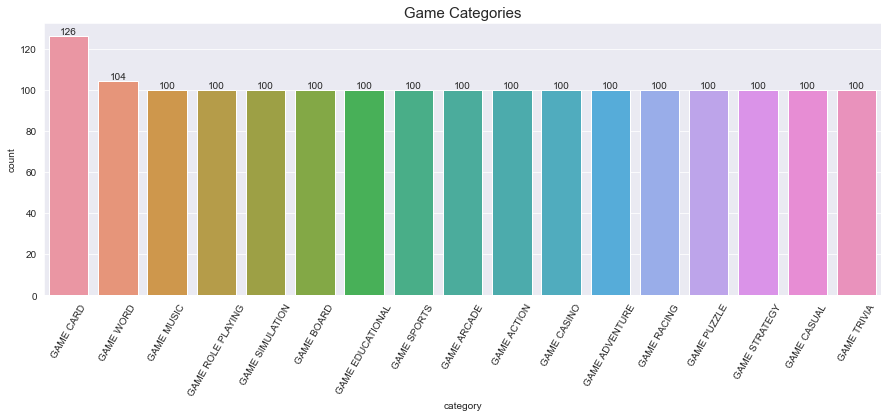

In [33]:
# with seaborn

plt.figure(figsize = (15,5))
sns.countplot(x = df_1["category"], data = df_1, order = df_1["category"].value_counts().index)
plt.title("Game Categories", fontsize = 15)
plt.xticks(rotation = 60)

for index, value in enumerate(df_1["category"].value_counts().values):
    plt.text(index,value,str(value), ha = 'center', va= "bottom")
    
plt.show()

In [55]:
# with plotly

fig = px.histogram(df_1, x = "category", title = "Game Categories")
fig.update_layout(xaxis = go.layout.XAxis(tickangle = 60))
fig.update_layout(xaxis = {"categoryorder":"total descending"})

fig.show()

### Total Ratings

In [40]:
df_1["total ratings"].describe()

count    1.730000e+03
mean     1.064332e+06
std      3.429250e+06
min      3.299300e+04
25%      1.759992e+05
50%      4.286065e+05
75%      8.837970e+05
max      8.627313e+07
Name: total ratings, dtype: float64

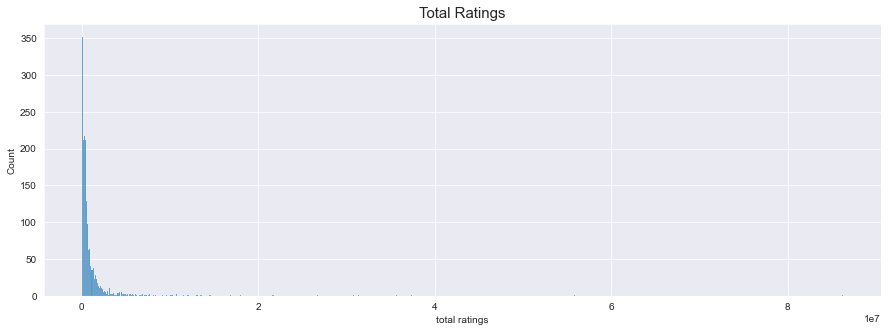

In [44]:
# with seaborn

plt.figure(figsize = (15,5))
sns.histplot(data = df_1, x = "total ratings")
plt.title("Total Ratings", fontsize = 15)

plt.show()

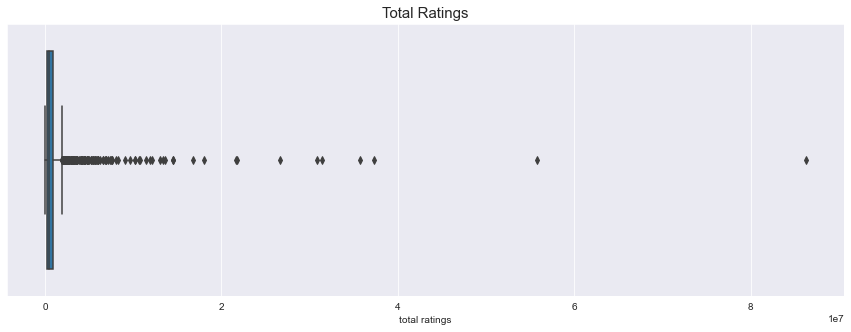

In [197]:
# with seaborn

plt.figure(figsize = (15,5))
sns.boxplot(data = df_1, x = "total ratings")
plt.title("Total Ratings", fontsize = 15)

plt.show()

In [50]:
# with plotly

fig = px.histogram(data_frame = df_1, x = "total ratings", title = "Total Ratings", marginal = "box")
fig.show()

### Number of Game Installed

In [56]:
df_1["installs_in_million"].describe()

count    1730.000000
mean       29.176185
std        60.287333
min         0.100000
25%         5.000000
50%        10.000000
75%        50.000000
max      1000.000000
Name: installs_in_million, dtype: float64

In [57]:
df_1["installs_in_million"].value_counts()

10.0      805
50.0      252
5.0       245
100.0     204
1.0       192
0.5        15
500.0      12
0.1         3
1000.0      2
Name: installs_in_million, dtype: int64

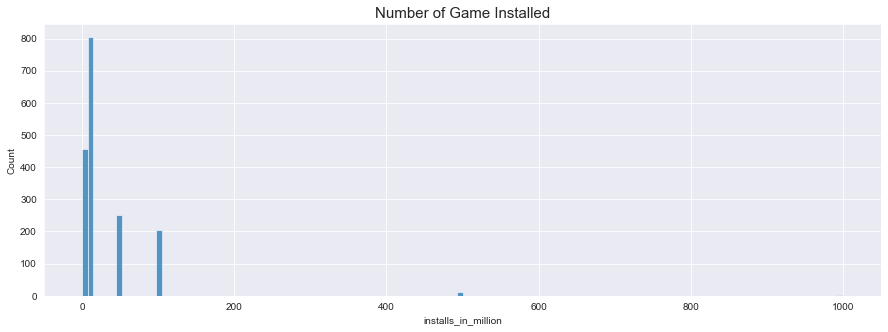

In [58]:
# with seaborn

plt.figure(figsize = (15,5))
sns.histplot(data = df_1, x = "installs_in_million")
plt.title("Number of Game Installed", fontsize = 15)

plt.show()

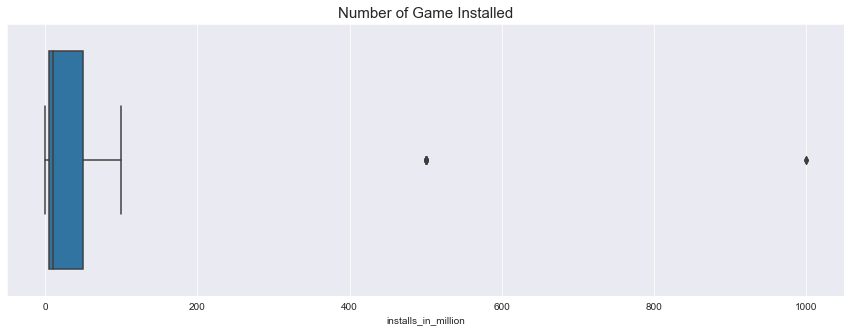

In [205]:
# with seaborn

plt.figure(figsize = (15,5))
sns.boxplot(data = df_1, x = "installs_in_million")
plt.title("Number of Game Installed", fontsize = 15)

plt.show()

In [60]:
# with plotly

fig = px.histogram(data_frame = df_1, x = "installs_in_million", title = "Number of Game Installed", marginal = "box")
fig.show()

### Paid-Free Games

In [61]:
df_1["paid"].value_counts()

False    1723
True        7
Name: paid, dtype: int64

In [62]:
df_1["paid"].value_counts(normalize=True)

False    0.995954
True     0.004046
Name: paid, dtype: float64

In [63]:
index = ["Paid", "Free"]
index

['Paid', 'Free']

In [64]:
values = [7, 1723]
values

[7, 1723]

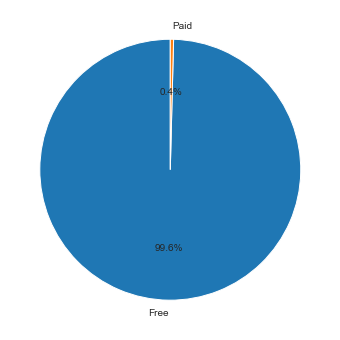

In [65]:
# with matplotlib

plt.figure(figsize = (8,6))
y = df_1["paid"].value_counts().values
mylabels = ["Free","Paid"]
myexplode = [0, 0]

plt.pie(y, labels = mylabels, labeldistance = 1.1, explode = myexplode, startangle = 90, autopct = '%1.1f%%')

plt.show()

In [66]:
# with plotly

paid_free_games = df_1["paid"].value_counts()
label = ["Free","Paid"]
fig = px.pie(paid_free_games, values = df_1["paid"].value_counts().values, names=label,
             title = "Paid-Free Games")
fig.update_traces(textposition ='inside', textinfo = 'percent+label')
fig.show()

### Total Ratings by Category

In [69]:
total_ratings_by_category = df_1.groupby("category")["total ratings"].mean().sort_values(ascending=False)
total_ratings_by_category

category
GAME ACTION          4.011344e+06
GAME CASUAL          2.470866e+06
GAME STRATEGY        1.856570e+06
GAME ARCADE          1.793780e+06
GAME SPORTS          1.353829e+06
GAME RACING          1.139027e+06
GAME PUZZLE          9.466929e+05
GAME SIMULATION      9.341417e+05
GAME ADVENTURE       8.935617e+05
GAME ROLE PLAYING    7.087648e+05
GAME BOARD           4.457431e+05
GAME WORD            3.943603e+05
GAME CASINO          3.619031e+05
GAME CARD            3.326041e+05
GAME TRIVIA          2.982217e+05
GAME MUSIC           2.163020e+05
GAME EDUCATIONAL     1.529804e+05
Name: total ratings, dtype: float64

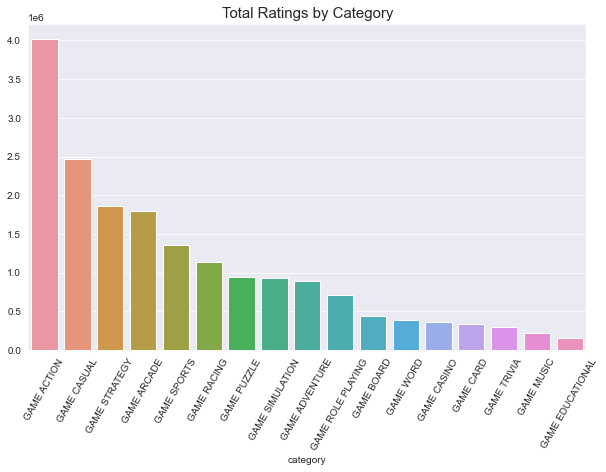

In [77]:
# with seaborn

plt.figure(figsize = (10,6))
sns.barplot(data = df_1, x = total_ratings_by_category.index, y = total_ratings_by_category.values)
plt.xticks(rotation = 60)
plt.title("Total Ratings by Category", fontsize = 15)

plt.show()

In [78]:
fig = px.bar(data_frame = df_1, x = total_ratings_by_category.index, y = total_ratings_by_category.values, 
             labels = {"y" : "Total Ratings"}, title = "Total Ratings by Category")
fig.update_layout(xaxis = go.layout.XAxis(tickangle = 60))
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

### Number of Installations by Category

In [79]:
number_installations_by_category = df_1.groupby("category")["installs_in_million"].mean().sort_values(ascending=False)
number_installations_by_category

category
GAME ACTION          74.100000
GAME ARCADE          71.610000
GAME CASUAL          63.970000
GAME RACING          46.750000
GAME PUZZLE          36.210000
GAME SPORTS          33.610000
GAME SIMULATION      27.710000
GAME STRATEGY        23.910000
GAME BOARD           21.230000
GAME ADVENTURE       18.030000
GAME EDUCATIONAL     17.895000
GAME ROLE PLAYING    14.080000
GAME MUSIC           12.487000
GAME CARD            12.484127
GAME WORD            12.317308
GAME CASINO           7.715000
GAME TRIVIA           6.901000
Name: installs_in_million, dtype: float64

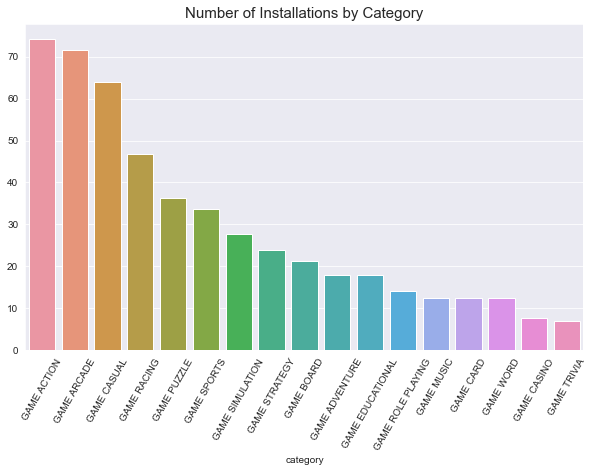

In [80]:
# with seaborn

plt.figure(figsize = (10,6))
sns.barplot(data = df_1, x = number_installations_by_category.index, y = number_installations_by_category.values)
plt.xticks(rotation = 60)
plt.title("Number of Installations by Category", fontsize = 15)
plt.show()

In [81]:
# with plotly

fig = px.bar(data_frame = df_1, x = number_installations_by_category.index, y = number_installations_by_category.values,
             labels = {"y":'Install'}, title = "Number of Installations by Category")
fig.update_layout(xaxis = go.layout.XAxis(tickangle = 60))
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.show()

### Top 5 Ranked Games by Category

- Rank
- Title
- Category
- Total ratings
- Installation

In [85]:
top_5_ranked_games = df_1[df_1['rank']<6][['rank','title','category', 'total ratings', 'installs_in_million', '5 star ratings']]
top_5_ranked_games

,rank,title,category,total ratings,installs_in_million,5 star ratings
0,1,Garena Free Fire- World Series,GAME ACTION,86273129,500.0,63546766
1,2,PUBG MOBILE - Traverse,GAME ACTION,37276732,500.0,28339753
2,3,Mobile Legends: Bang Bang,GAME ACTION,26663595,100.0,18777988
3,4,Brawl Stars,GAME ACTION,17971552,100.0,13018610
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,GAME ACTION,14464235,500.0,9827328
...,...,...,...,...,...,...
1626,1,كلمات كراش - لعبة تسلية وتحدي من زيتونة,GAME WORD,2418119,10.0,2115189
1627,2,Word Cookies!®,GAME WORD,2250585,10.0,1679256
1628,3,Words of Wonders: Crossword to Connect Vocabulary,GAME WORD,1885400,100.0,1457939
1629,4,Words with Friends Classic: Word Puzzle Challenge,GAME WORD,1722914,50.0,971880


In [87]:
top_5_ranked_games.value_counts()

rank  title                                           category         total ratings  installs_in_million  5 star ratings
1     8 Ball Pool                                     GAME SPORTS      21632735       500.0                16281475          1
      Candy Crush Saga                                GAME CASUAL      31367945       1000.0               23837448          1
4     Toy Blast                                       GAME PUZZLE      2941258        50.0                 2267242           1
      Teen Patti by Octro - Real 3 Patti Game         GAME CASINO      1494419        50.0                 1080443           1
      Plague Inc.                                     GAME SIMULATION  3519405        100.0                2613482           1
                                                                                                                            ..
2     PUBG MOBILE - Traverse                          GAME ACTION      37276732       500.0                28339753 

In [93]:
fig = px.scatter(top_5_ranked_games, y= 'title', x='total ratings', 
                 hover_data = top_ranked_games[['category','rank']], color='category', 
                 title = "Top 5 Ranked Games by Total Ratings")
fig.show()